<a href="https://colab.research.google.com/github/AliNajafpour/AI-Face-Identifier/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/lfw-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lfw-dataset


In [10]:
img1 = '/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/AJ_Cook/AJ_Cook_0001.jpg'
img2 = '/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/Aaron_Pena/Aaron_Pena_0001.jpg'

In [12]:
def preprocess(img, size=(160, 160)):
    img = cv2.imread(img)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    equalizer = cv2.equalizeHist(blur)

    bgr = cv2.cvtColor(equalizer, cv2.COLOR_GRAY2BGR)
    result = cv2.resize(bgr, size)

    return result

In [33]:
def preprocess_image(image_path, output_path, target_size=(224, 224)):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load {image_path}")
        return

    # Convert to grayscale for preprocessing
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Contrast enhancement: CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # Convert back to BGR for brightness adjustment
    enhanced_bgr = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)

    # Brightness adjustment: Linear scaling
    bright = cv2.convertScaleAbs(enhanced_bgr, alpha=1.2, beta=10)

    # Resize image
    resized = cv2.resize(bright, target_size, interpolation=cv2.INTER_LINEAR)


    print(f"Saved preprocessed image to {output_path}")
    return resized


array([[[10, 10, 10],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 9,  9,  9],
        [ 7,  7,  7],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 9,  9,  9],
        [ 6,  6,  6],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 2,  2,  2],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
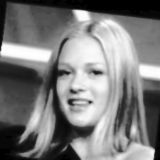

In [27]:
out1_1 = preprocess(img1)
out1_1

Saved preprocessed image to 


array([[[21, 21, 21],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[17, 17, 17],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[16, 16, 16],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [16, 16, 16],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [24, 24, 24],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]]], dtype=uint8)
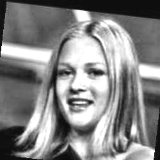

In [34]:
out1_2 = preprocess_image(img1,'', (160, 160))
out1_2

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
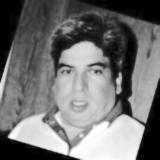

In [35]:
out2_1 = preprocess(img2)
out2_1

Saved preprocessed image to 


array([[[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]]], dtype=uint8)
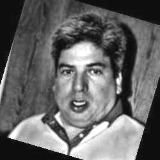

In [36]:
out2_2 = preprocess_image(img2,'', (160, 160))
out2_2